In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import pandas as pd
import os
from astropy.io import fits
from astropy.table import Table
import img_scale

sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.0, as_cmap=True)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### set home for files
hpath = os.environ['HOME'] + '/'

CO(1-0): $\lambda$ 2.6 mm / 2600 $\mu$m

Band 1 35-50 Ghz /  6000-8571 $\mu$m

In [12]:
6000 / 2600 - 1, 8571 / 2600 - 1

(1.3076923076923075, 2.2965384615384616)

In [3]:
galdb = pd.read_pickle(hpath + 'Github/Quiescent_analysis/data/upd_galDB.pkl')

In [16]:
gsd_cat = Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/Catalog/goodss_3dhst.v4.1.cat', format = 'ascii').to_pandas()

In [17]:
sgaldb = galdb[10:]

In [32]:
sgaldb =sgaldb.query('z_grism >= 1.3')

In [143]:
sgaldb

,gids,z_grism,z_grism_+,z_grism_-,Z,Z_l,Z_h,Zx,Zx_l,Zx_h,...,d_h,dx,dx_l,dx_h,l_mass,SNR,rf_lmass,UV,VJ,ids
12,s39012,1.612,0.009619,0.024048,0.015,0.009,0.010,0.014176,0.008136,0.010493,...,0.223,0.422846,0.226453,0.300601,11.09,1.803361,11.08,2.217626,1.450882,39012
16,s39804,1.333,0.004810,0.001000,0.018,0.005,0.007,0.017824,0.005275,0.007070,...,0.187,0.280561,0.158317,0.206413,10.91,4.478888,10.93,1.996339,1.130179,39804
18,s40223,1.595,0.004810,0.004810,0.016,0.009,0.009,0.015467,0.007968,0.009371,...,0.274,0.482966,0.244489,0.290581,10.66,2.274337,10.66,1.873829,1.204045,40223
21,s40623,1.413,0.019238,0.004810,0.020,0.005,0.005,0.019339,0.004321,0.005555,...,0.157,0.268537,0.150301,0.188377,10.76,4.681911,10.71,2.067328,1.250794,40623
22,s40862,1.328,0.002405,0.004810,0.022,0.009,0.006,0.021808,0.008641,0.005780,...,0.221,0.452906,0.226453,0.268537,10.92,4.865175,10.94,1.885666,1.321727,40862
23,s41520,1.605,0.002405,0.002405,0.019,0.010,0.008,0.018497,0.009259,0.008697,...,0.098,0.727455,0.202405,0.170341,10.92,3.438552,10.93,1.937231,1.220936,41520
26,s44042,1.612,0.002405,0.002405,0.025,0.017,0.004,0.024333,0.016216,0.004265,...,0.099,0.222445,0.132265,0.176353,11.02,4.031286,11.01,1.979891,1.195799,44042
27,s44620,1.334,0.004810,0.007214,0.016,0.010,0.010,0.015186,0.009090,0.010325,...,0.174,0.619238,0.282565,0.254509,10.50,4.776155,10.51,1.619682,1.042180,44620
29,s46066,1.326,0.012024,0.002405,0.020,0.006,0.006,0.019788,0.005331,0.005948,...,0.217,0.440882,0.222445,0.276553,10.85,3.351867,10.95,2.008351,1.126217,46066


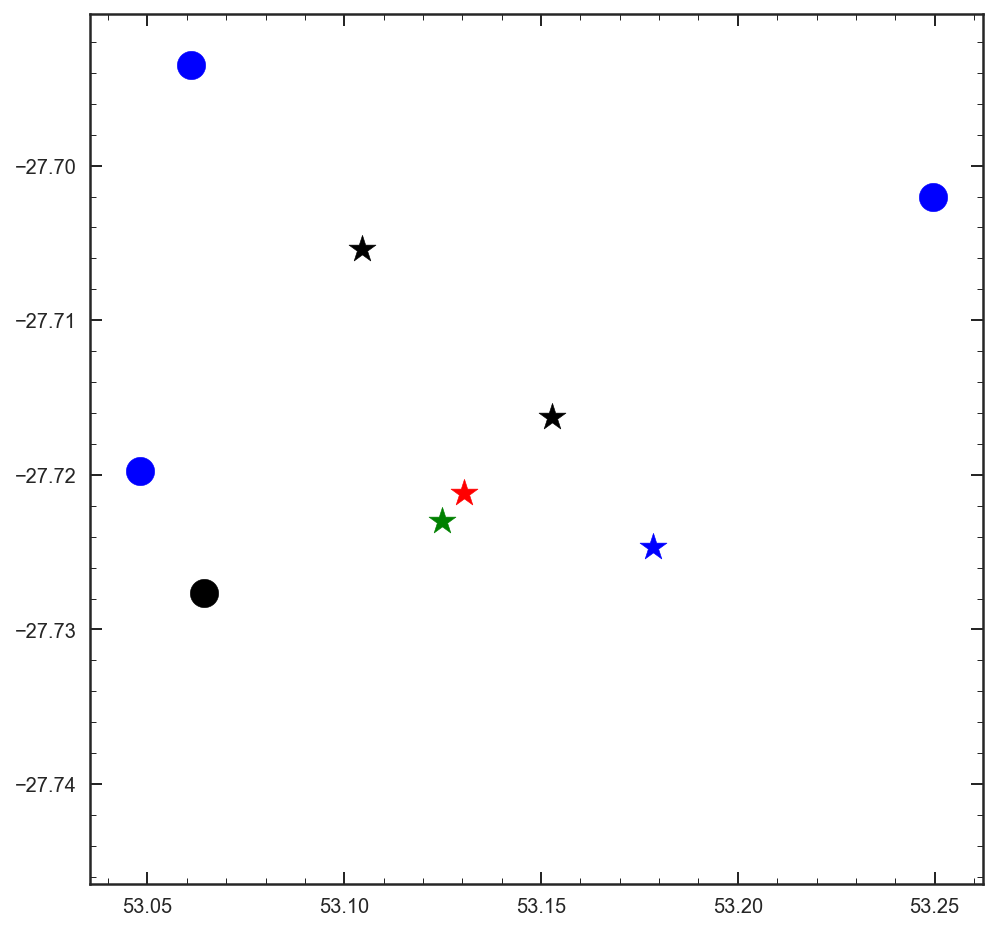

In [55]:
plt.figure(figsize=[8,8])

for i in sgaldb.index:
    ra = gsd_cat.query('id == {0}'.format(sgaldb.ids[i])).ra.values
    dec = gsd_cat.query('id == {0}'.format(sgaldb.ids[i])).dec.values    
    
    if 1.3 <= sgaldb.z_grism[i] < 1.4:
        colr = 'b'
    
    if 1.4 <= sgaldb.z_grism[i] < 1.5:
        colr = 'r'    
   
    if 1.5 <= sgaldb.z_grism[i] < 1.6:
        colr = 'g'
        
    if sgaldb.z_grism[i] >= 1.6:
        colr = 'k'
    
    if sgaldb.ids[i] in clist:
        shp = '*'
        
    else:
        shp = 'o'
    
    plt.scatter(ra,dec,marker=shp, s=200, color = colr)

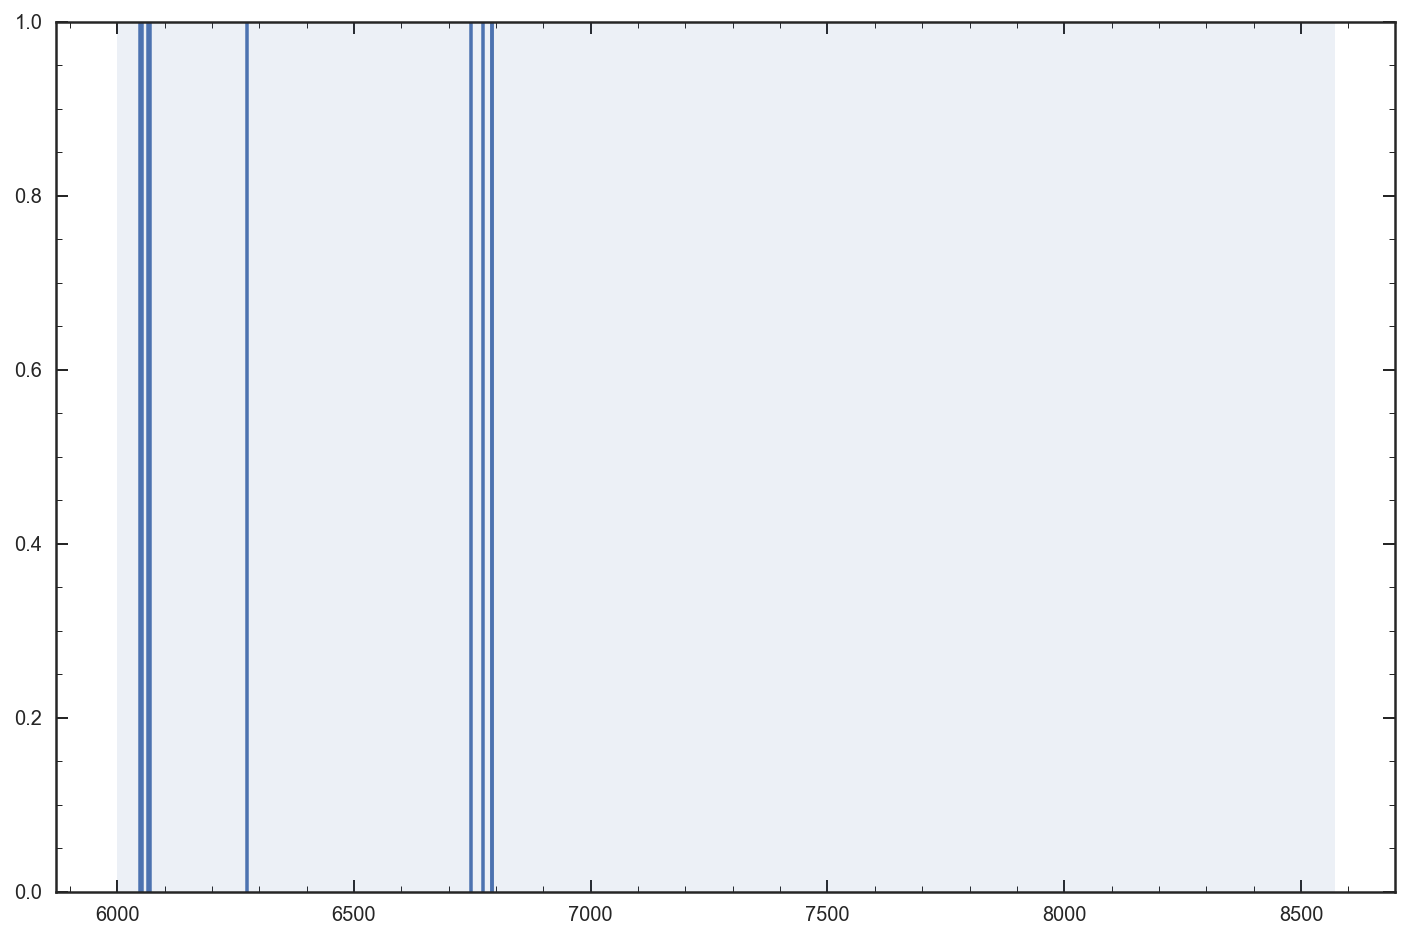

In [59]:
plt.figure(figsize=[12,8])

co10 = 2600

plt.axvspan(6000,8571, alpha = 0.1)


for i in sgaldb.index:
    plt.axvline(2600 * (sgaldb.z_grism[i] + 1))

## img pull

In [205]:
seg = fits.open('/Users/vestrada/ALMA/gsd_img/goodss_3dhst.v4.0.F160W_seg.fits')[0].data
f160 = fits.open('/Users/vestrada/ALMA/gsd_img/goodss_3dhst.v4.0.F160W_orig_sci.fits')[0].data
f140 = fits.open('/Users/vestrada/ALMA/gsd_img/goodss_3dhst.v4.0.F140W_orig_sci.fits')[0].data
f125 = fits.open('/Users/vestrada/ALMA/gsd_img/goodss_3dhst.v4.0.F125W_orig_sci.fits')[0].data
f105 = fits.open('/Users/vestrada/ALMA/gsd_img/goodss-F105W-astrodrizzle-v4.4_drz_sci.fits')[0].data

In [207]:
f125.shape

(19700, 17500)

In [208]:
idx = np.argwhere(seg == 40223)

f105img = f105[min(idx.T[0]) - 5: max(idx.T[0]) +5, min(idx.T[1]) -5: max(idx.T[1]) +5]
f125img = f125[min(idx.T[0]) - 5: max(idx.T[0]) +5, min(idx.T[1]) -5: max(idx.T[1]) +5]
f140img = f140[min(idx.T[0]) - 5: max(idx.T[0]) +5, min(idx.T[1]) -5: max(idx.T[1]) +5]
f160img = f160[min(idx.T[0]) - 5: max(idx.T[0]) +5, min(idx.T[1]) -5: max(idx.T[1]) +5]

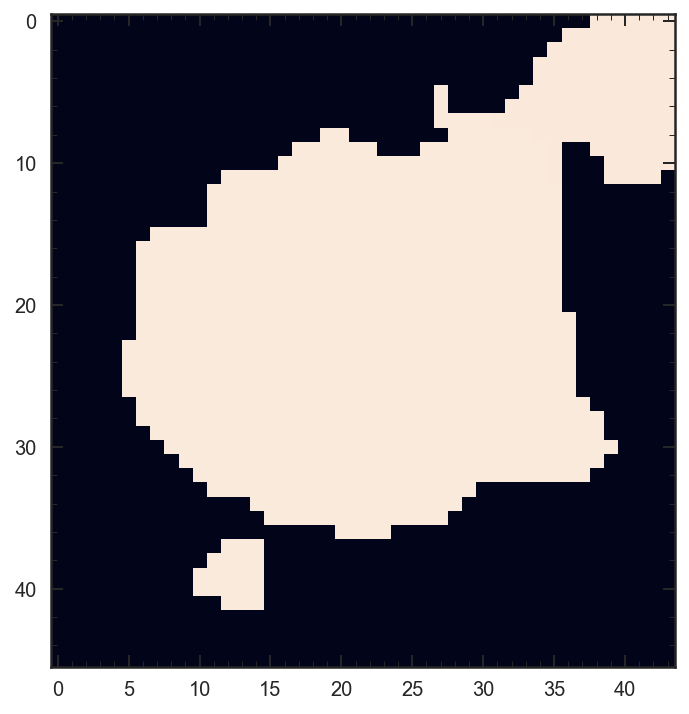

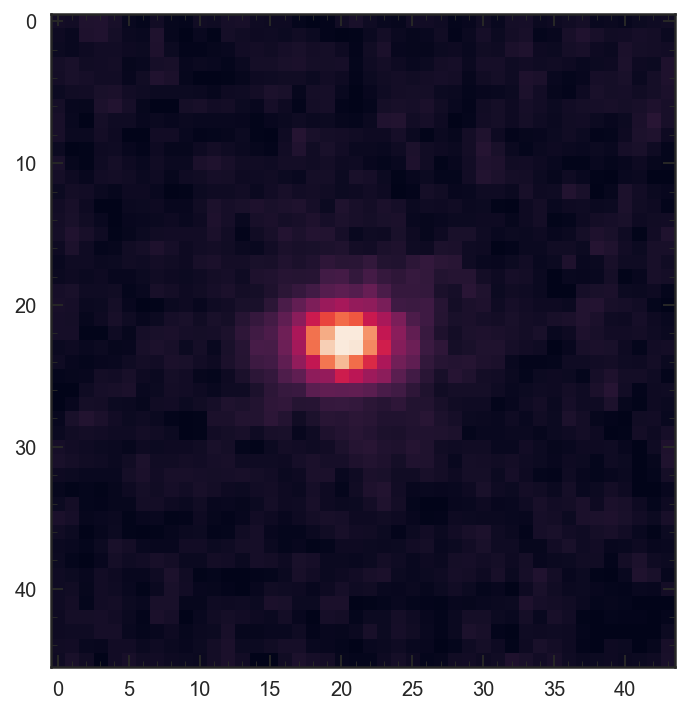

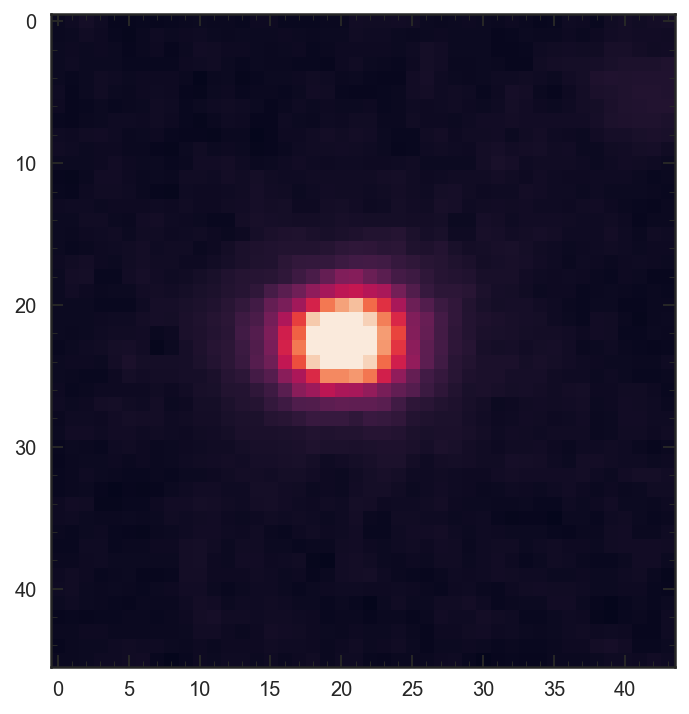

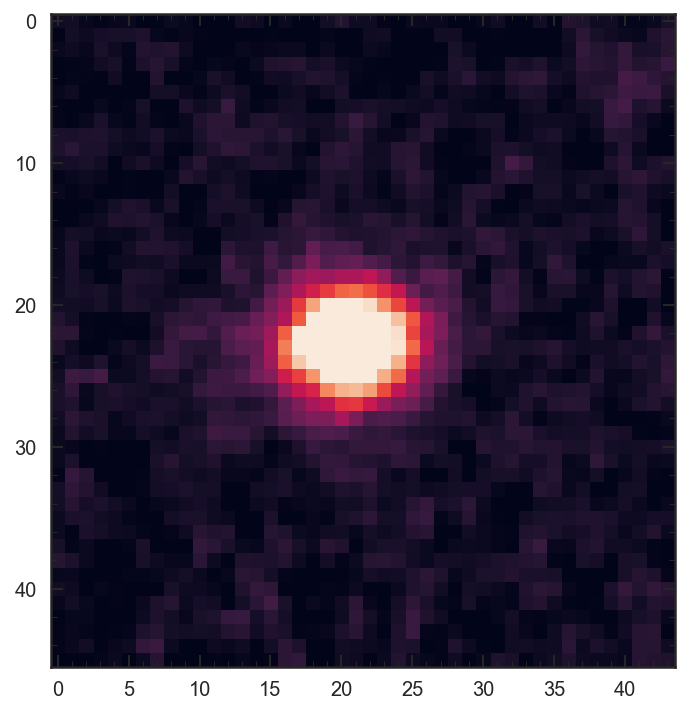

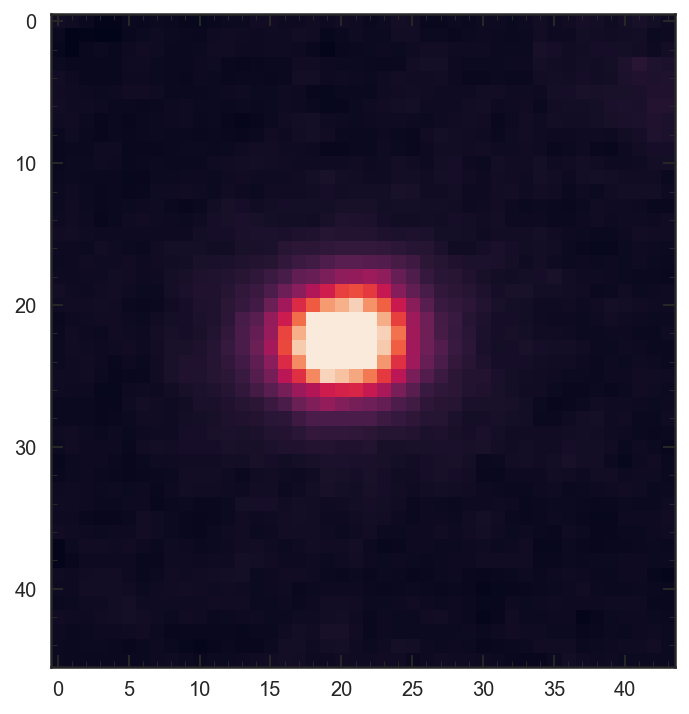

In [209]:
plt.figure(figsize=[6,6])
plt.imshow(seg[min(idx.T[0]) - 5: max(idx.T[0]) +5, min(idx.T[1]) -5: max(idx.T[1]) +5])

plt.figure(figsize=[6,6])
plt.imshow(f105img, vmin = -0.01, vmax = 0.3)

plt.figure(figsize=[6,6])
plt.imshow(f125img, vmin = -0.01, vmax = 0.3)

plt.figure(figsize=[6,6])
plt.imshow(f140img, vmin = -0.01, vmax = 0.3)

plt.figure(figsize=[6,6])
plt.imshow(f160img, vmin = -0.01, vmax = 0.3)

img_scale : asinh
img_scale : asinh
img_scale : asinh


Text(0.5,1,'Blue = F125W, Green = F140W, Red = F160W')

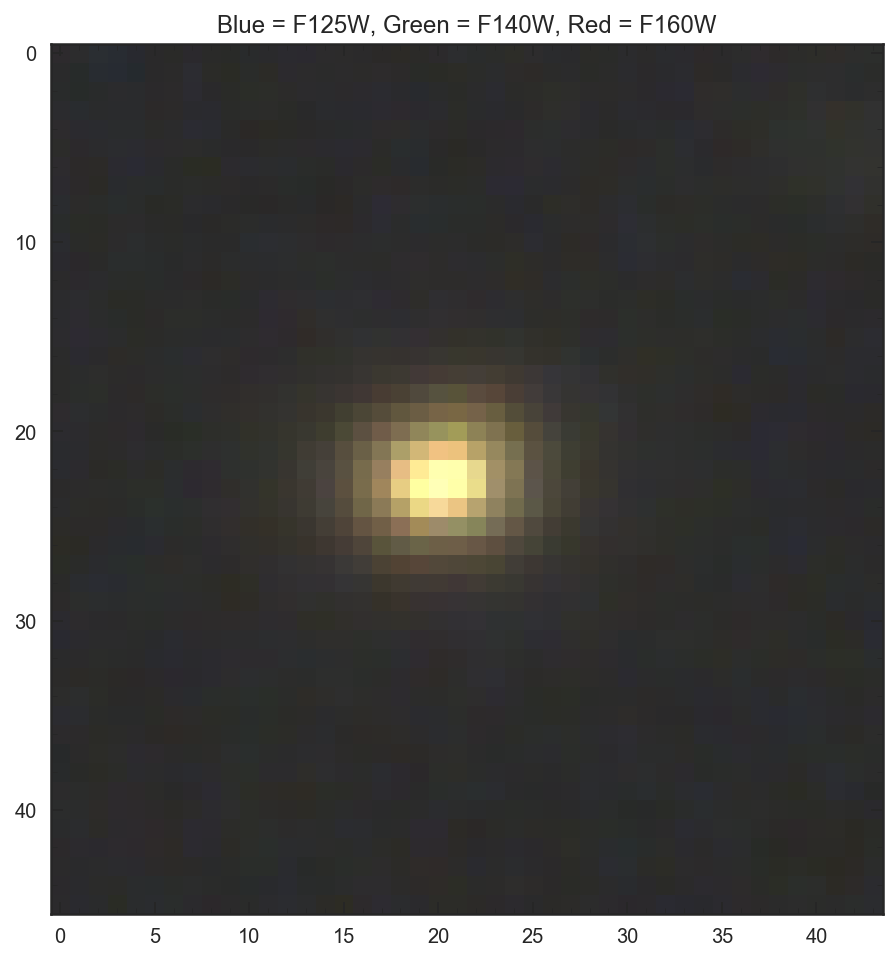

In [211]:
img = np.zeros((f125img.shape[0], f125img.shape[1], 3), dtype=float)
img[:,:,0] = img_scale.asinh(f160img, scale_min=-0.1, scale_max=0.5)
# img[:,:,1] = img_scale.asinh(f140img, scale_min=-0.1, scale_max=0.5)
img[:,:,1] = img_scale.asinh(f125img, scale_min=-0.1, scale_max=0.5)
img[:,:,2] = img_scale.asinh(f105img, scale_min=-0.1, scale_max=0.5)

plt.figure(figsize=[8,8])
plt.imshow(img,aspect='equal')
plt.title('Blue = F105W, Green = F125W, Red = F160W')

In [217]:
int((max(idx.T[0]) + min(idx.T[0])) / 2)

15528

img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh


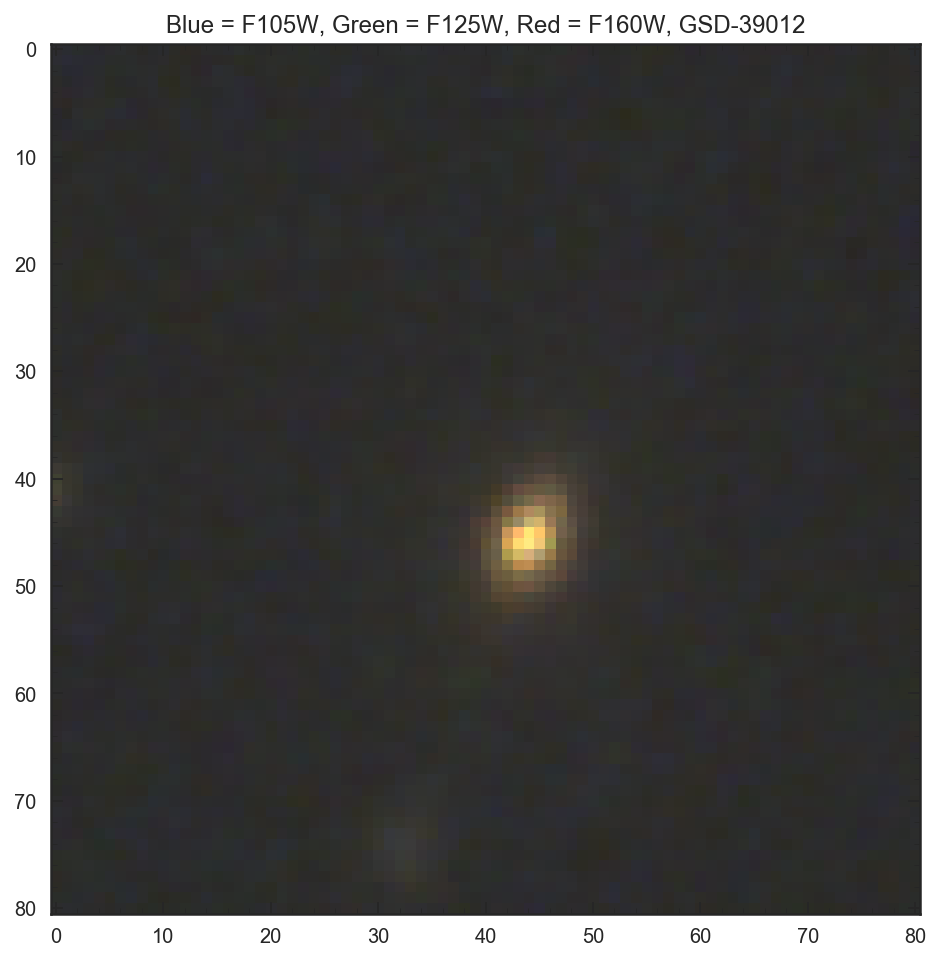

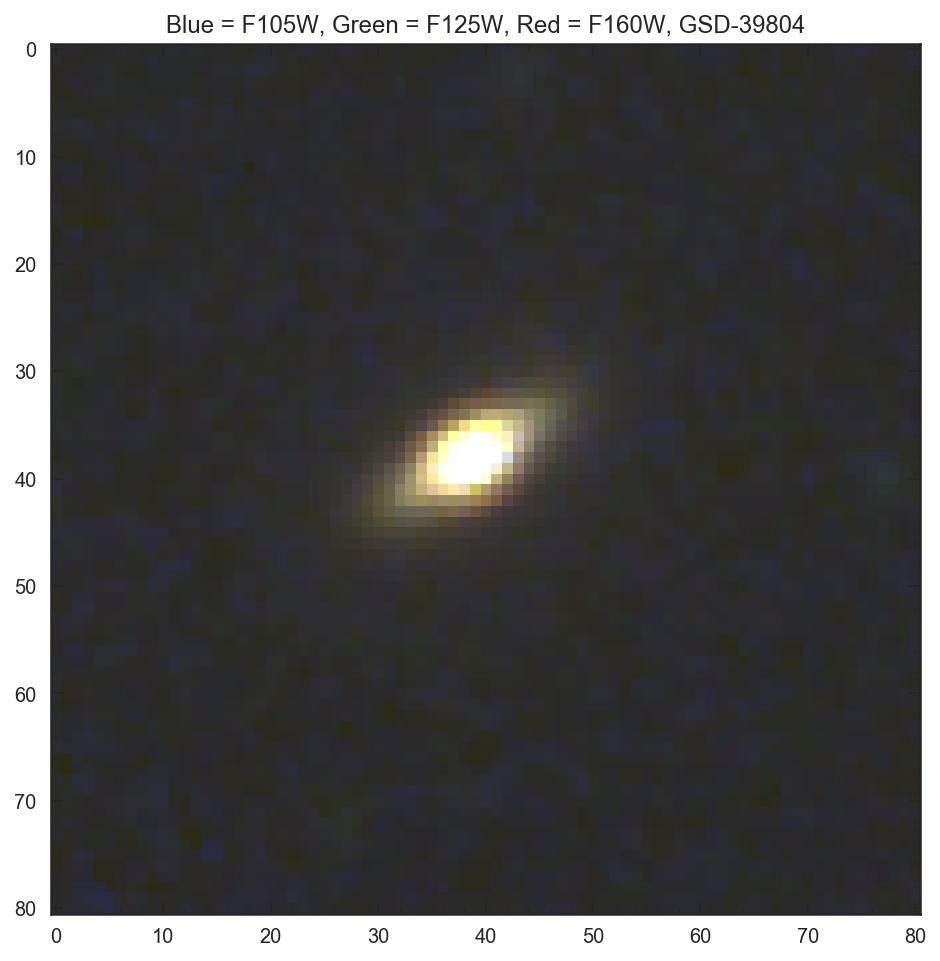

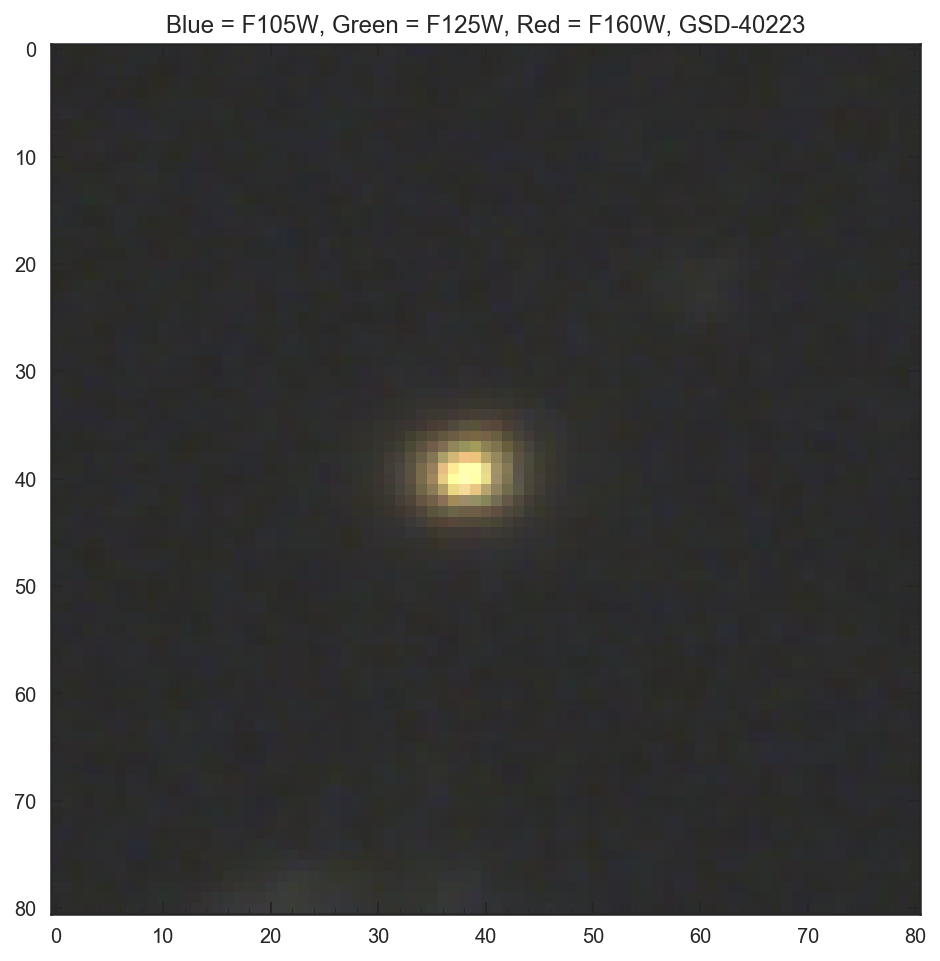

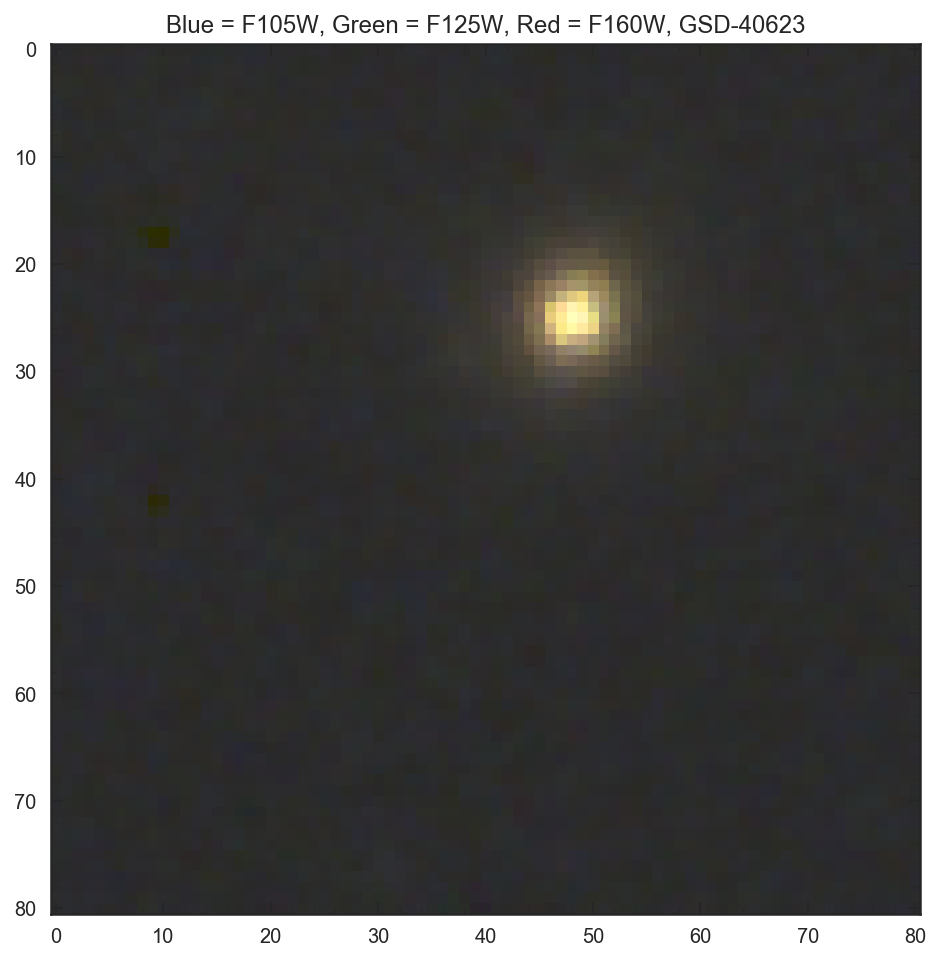

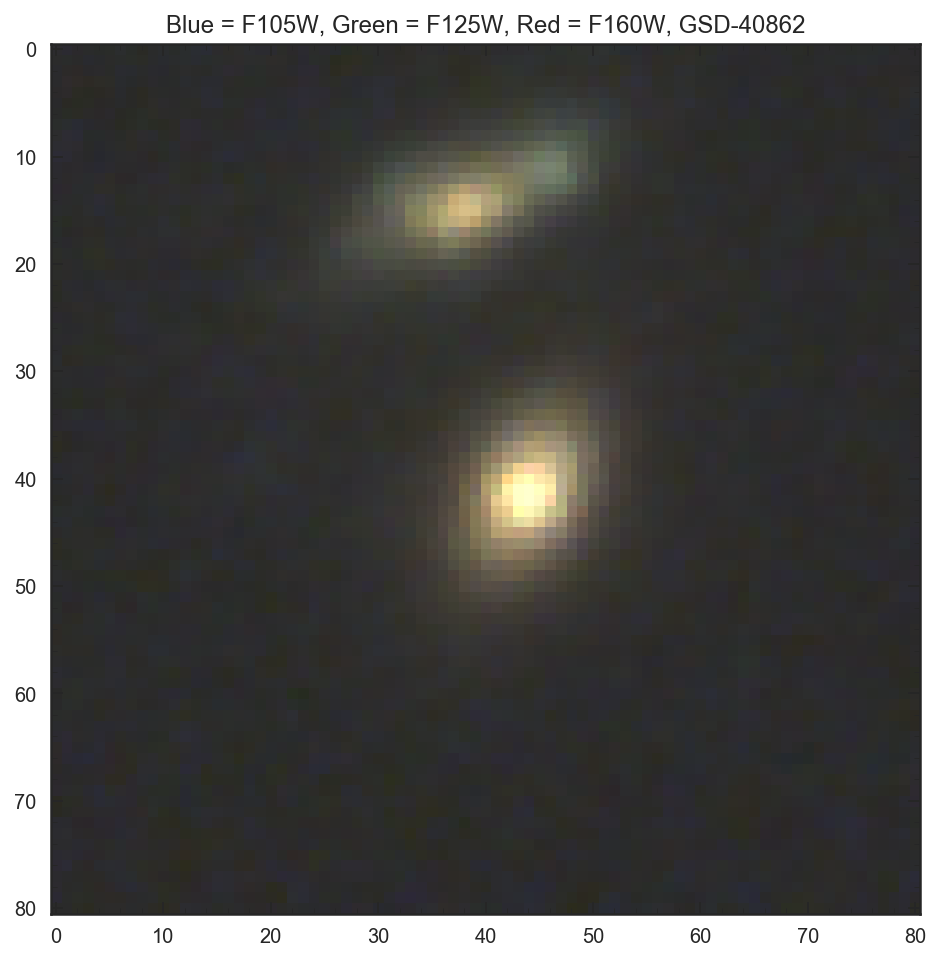

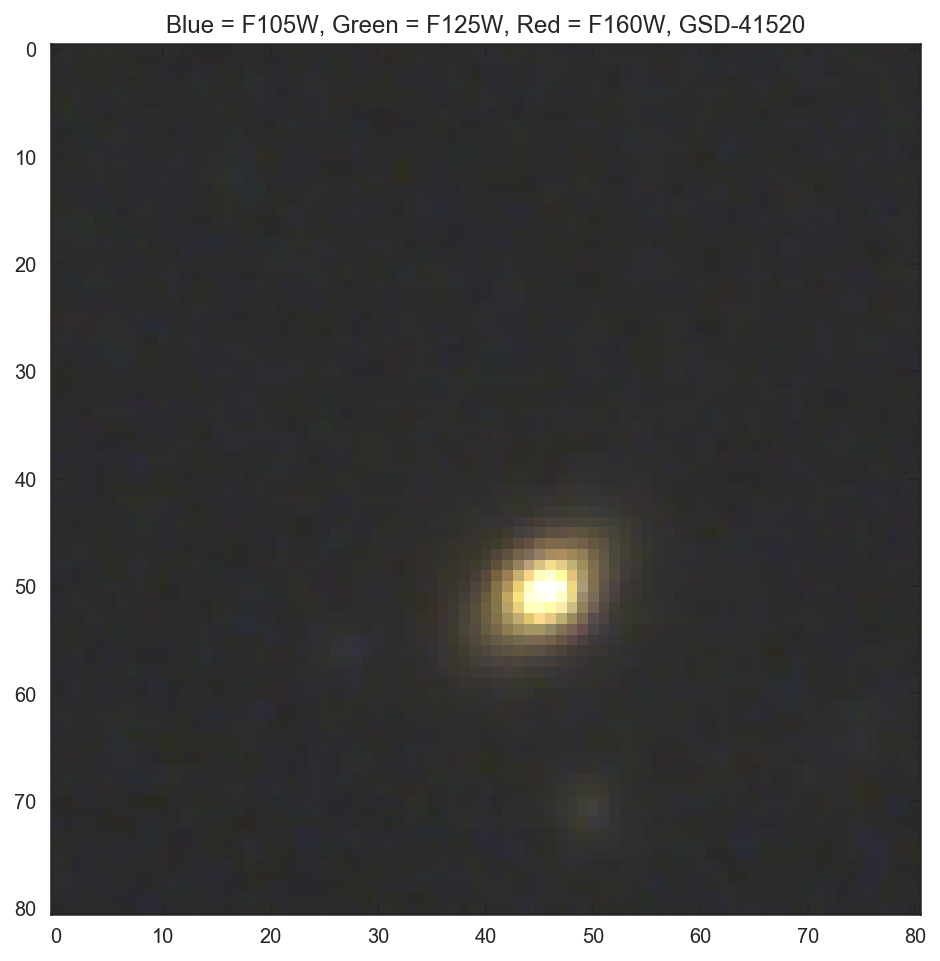

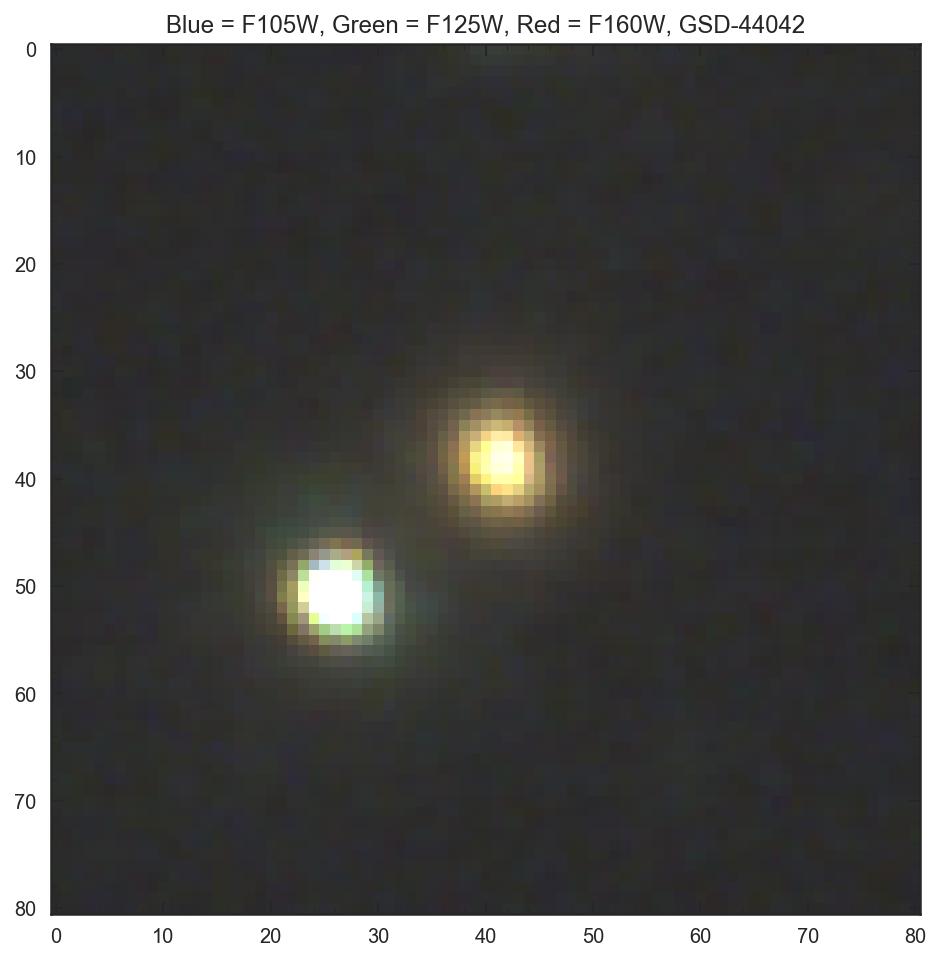

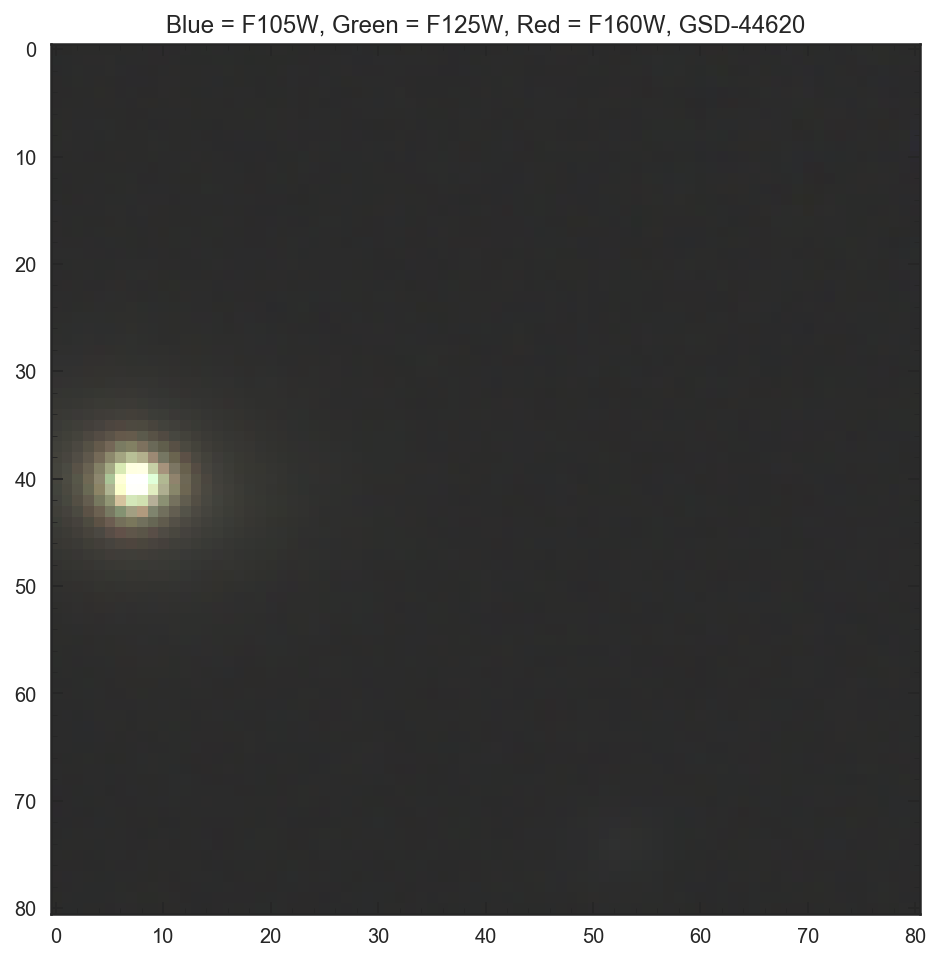

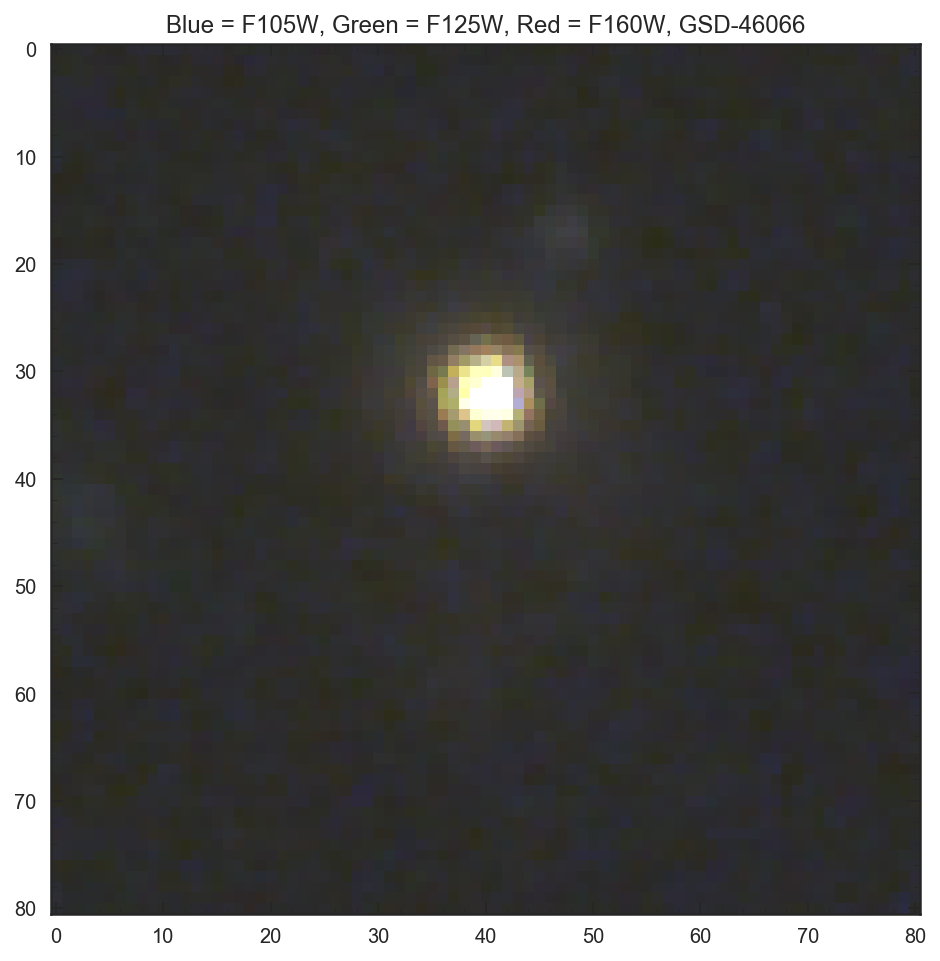

In [218]:
for i in sgaldb.index:
    idx = np.argwhere(seg == sgaldb.ids[i])

    ycnt =int((max(idx.T[0]) + min(idx.T[0])) / 2)
    xcnt = int((max(idx.T[1]) + min(idx.T[1])) / 2)
    
    f105img = f105[ycnt - 40: ycnt + 41, xcnt - 40: xcnt + 41]
    f125img = f125[ycnt - 40: ycnt + 41, xcnt - 40: xcnt + 41]
#     f140img = f140[min(idx.T[0]) - 5: max(idx.T[0]) +5, min(idx.T[1]) -5: max(idx.T[1]) +5]
    f160img = f160[ycnt - 40: ycnt + 41, xcnt - 40: xcnt + 41]

    img = np.zeros((f125img.shape[0], f125img.shape[1], 3), dtype=float)
    img[:,:,0] = img_scale.asinh(f160img, scale_min=-0.1, scale_max=0.5)
    img[:,:,1] = img_scale.asinh(f125img, scale_min=-0.1, scale_max=0.5)
    img[:,:,2] = img_scale.asinh(f105img, scale_min=-0.1, scale_max=0.5)

    plt.figure(figsize=[8,8])
    plt.imshow(img,aspect='equal')
    plt.title('Blue = F105W, Green = F125W, Red = F160W, GSD-{0}'.format(sgaldb.ids[i]))

Text(0.5,1,'Blue = F125W, Green = F140W, Red = F160W')

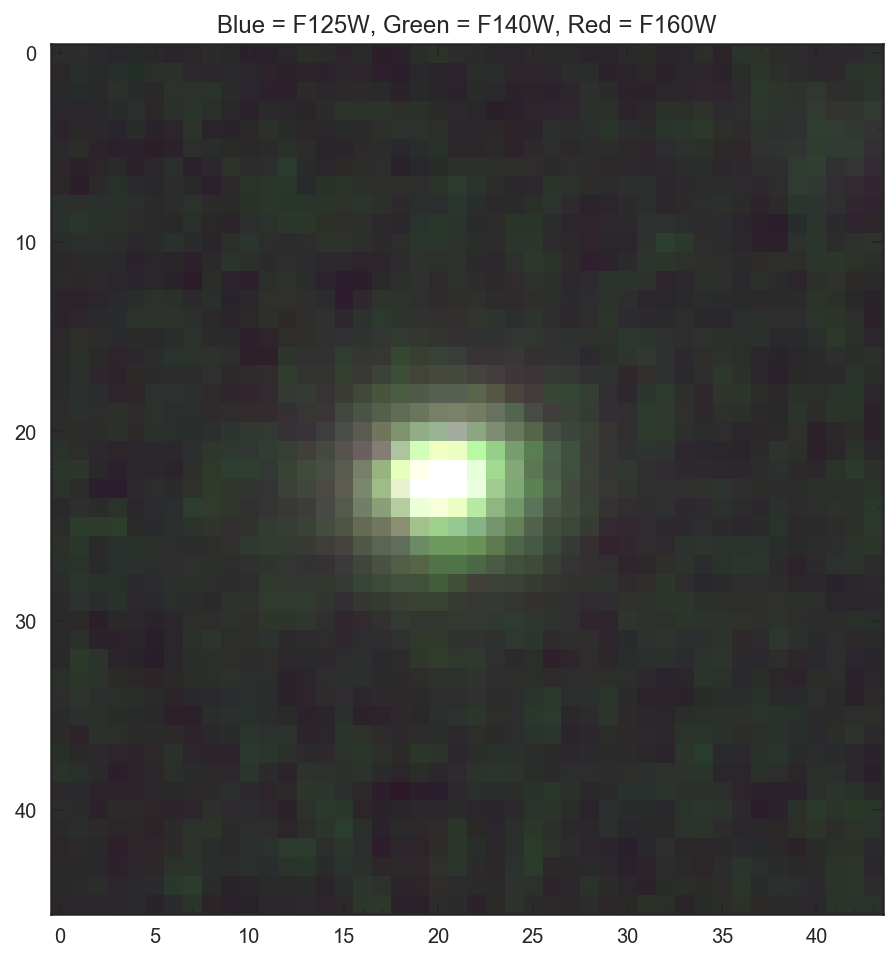

In [202]:
plt.figure(figsize=[8,8])
plt.imshow(img,)
plt.title('Blue = F125W, Green = F140W, Red = F160W')